<a href="https://colab.research.google.com/github/rakesh4real/APACHE-KAFKA/blob/main/producers_kafka_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note:** Do **NOT** click `Run All` .Make sure you add addresses in config files as specified **every time** you run this notebook!

# Install Libraries

In [ ]:
!pip install kafka-python
!pip install Faker

     |████████████████████████████████| 1.1MB 2.7MB/s 


In [ ]:
from google.colab.output import serve_kernel_port_as_window as expose

# 1. Install Kafka and Zookeeper

Download `tgz` file and follow instructions [here](https://kafka.apache.org/quickstart)

In [ ]:
!curl -O https://mirrors.estointernet.in/apache/kafka/2.6.0/kafka_2.13-2.6.0.tgz
!tar -xzf kafka_2.13-2.6.0.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 62.5M  100 62.5M    0     0  2638k      0  0:00:24  0:00:24 --:--:-- 8562k


In [ ]:
!ls kafka_2.13-2.6.0/config

connect-console-sink.properties    consumer.properties
connect-console-source.properties  log4j.properties
connect-distributed.properties	   producer.properties
connect-file-sink.properties	   server.properties
connect-file-source.properties	   tools-log4j.properties
connect-log4j.properties	   trogdor.conf
connect-mirror-maker.properties    zookeeper.properties
connect-standalone.properties


`server.properties` for all brokers' and ` zookeeper.properties` for management and sync

**`server.properties`:** (At correct location)

```
advertised.listeners=PLAINTEXT://localhost:9092
.
.
zookeeper.connect=localhost:2181
```

**Note:** Start Zookeeper first

In [ ]:
!cd kafka_2.13-2.6.0 && bin/zookeeper-server-start.sh -daemon config/zookeeper.properties
!cd kafka_2.13-2.6.0 && JMX_PORT=8004 bin/kafka-server-start.sh -daemon config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


The two java processes correspond to zookeeper and the kafka instances.

In [ ]:
!ps -ef | grep kafka

root         487       1 16 11:25 ?        00:00:01 java -Xmx512M -Xms512M -server -XX:+UseG1GC -XX:MaxGCPauseMillis=20 -XX:InitiatingHeapOccupancyPercent=35 -XX:+ExplicitGCInvokesConcurrent -XX:MaxInlineLevel=15 -Djava.awt.headless=true -Xlog:gc*:file=/content/kafka_2.13-2.6.0/bin/../logs/zookeeper-gc.log:time,tags:filecount=10,filesize=102400 -Dcom.sun.management.jmxremote -Dcom.sun.management.jmxremote.authenticate=false -Dcom.sun.management.jmxremote.ssl=false -Dkafka.logs.dir=/content/kafka_2.13-2.6.0/bin/../logs -Dlog4j.configuration=file:bin/../config/log4j.properties -cp /content/kafka_2.13-2.6.0/bin/../libs/activation-1.1.1.jar:/content/kafka_2.13-2.6.0/bin/../libs/aopalliance-repackaged-2.5.0.jar:/content/kafka_2.13-2.6.0/bin/../libs/argparse4j-0.7.0.jar:/content/kafka_2.13-2.6.0/bin/../libs/audience-annotations-0.5.0.jar:/content/kafka_2.13-2.6.0/bin/../libs/commons-cli-1.4.jar:/content/kafka_2.13-2.6.0/bin/../libs/commons-lang3-3.8.1.jar:/content/kafka_2.13-2.6.0/bin/../lib

# 2. Setup Kafka Manager

Make sure of java 8+ 

In [ ]:
!java --version

openjdk 11.0.9 2020-10-20
OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)


In [ ]:
!git clone https://github.com/yahoo/CMAK

Cloning into 'CMAK'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 6272 (delta 0), reused 0 (delta 0), pack-reused 6271
Receiving objects: 100% (6272/6272), 3.84 MiB | 24.00 MiB/s, done.
Resolving deltas: 100% (4060/4060), done.


Below command will create `target` folder upon successful compilation

In [ ]:
!cd CMAK && ./sbt clean dist 

In [ ]:
%cd CMAK/target/universal
!unzip cmak-3.0.0.5.zip
%cd cmak-3.0.0.5

In [ ]:
!ls conf

application.conf  consumer.properties  logback.xml  logger.xml	routes


Add `<zookeerper-host-addr>:port` in `application.conf`:
```
#cmak.zkhosts="kafka-manager-zookeeper:2181"
cmak.zkhosts="localhost:2181"
```

In [ ]:
expose(8081)

<IPython.core.display.Javascript object>

### **Click on the above link 👆 (will not load anything) and run the below 👇 cell. Refresh the page; You will see manager running!**

In [ ]:
"""
Launch manager
"""

!bin/cmak -Dconfig.file=conf/application.conf -Dhttp.port=8081 

This application is already running (Or delete /content/CMAK/target/universal/cmak-3.0.0.5/RUNNING_PID file).


# Create new cluster

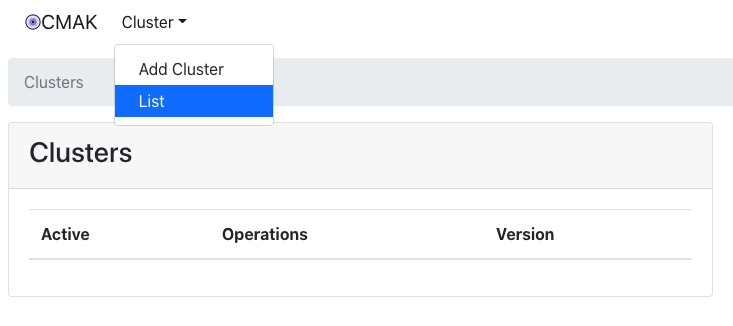

- **Cluster Name:** Give camelCased name. Eg, `TestCluster`
- **Cluster Zookeeper Hosts:** Coma separated addrs w/ ports (if multiple zookeepers) single address w/ port (if single zookeeper). Eg, `localhost:2181`
- [x] Enable JMX Polling (Set JMX_PORT env variable before starting kafka server)
- [x] Poll consumer information (Not recommended for large # of consumers if ZK is used for offsets tracking on older Kafka versions) -- To see how consumer is performing


**Leave others w/ default values** and click on `Save`

### ⭐️ To see the details about created clusters' `Brokers` (or) `Topics` click on the **number** adjacent to them

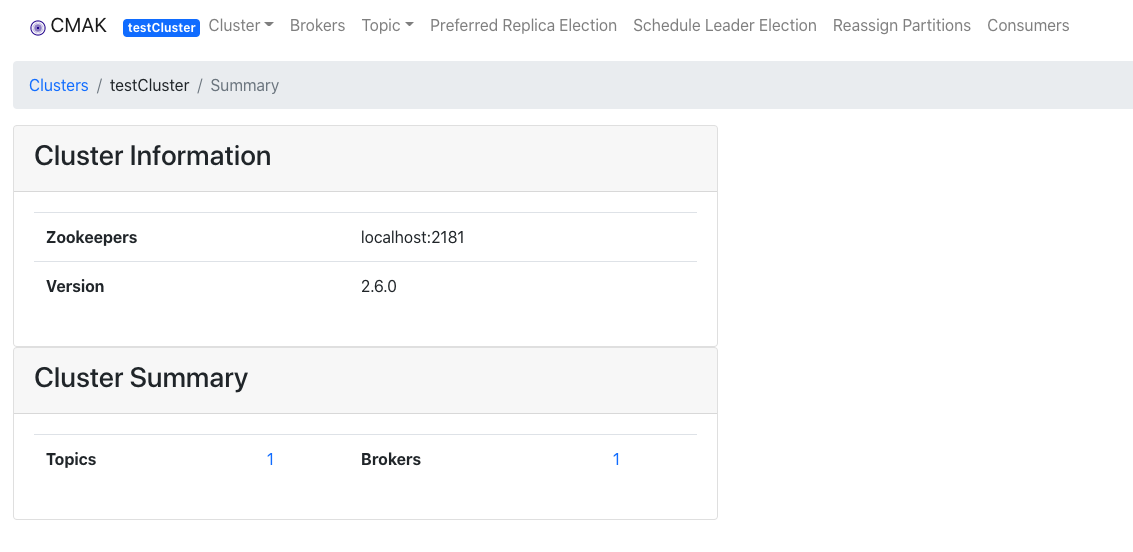

**Note:** You can Modify/Remove created clusters or add more clusters!


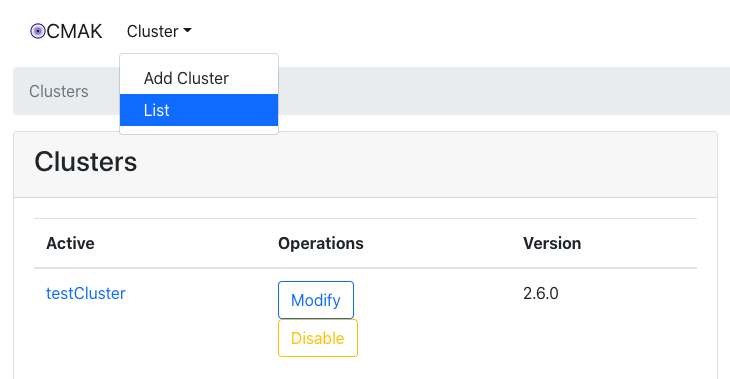

&nbsp;

----

<div style="text-align: center"> end of section </div>

----

&nbsp;

&nbsp;

# **Producer in Python**

Needed:

- `bootstrap_servers`(where the brokers are located) address and `port` (default is `9092` given above in server.properties)
- `topic` to publish data to
- `value_serializer` for data transmission

## **Case 1:**  Single Producer + Single broker + Single Partition

- If multiple partition, **randomly published** to partitions unless explicitly specified

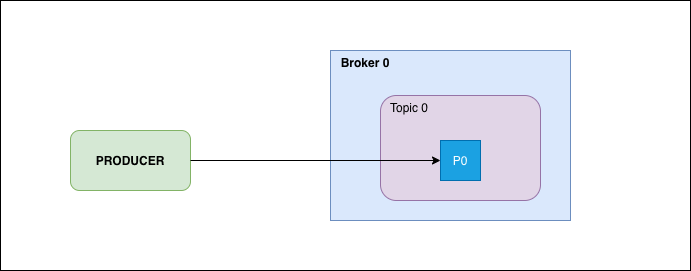

- Create topic using GUI

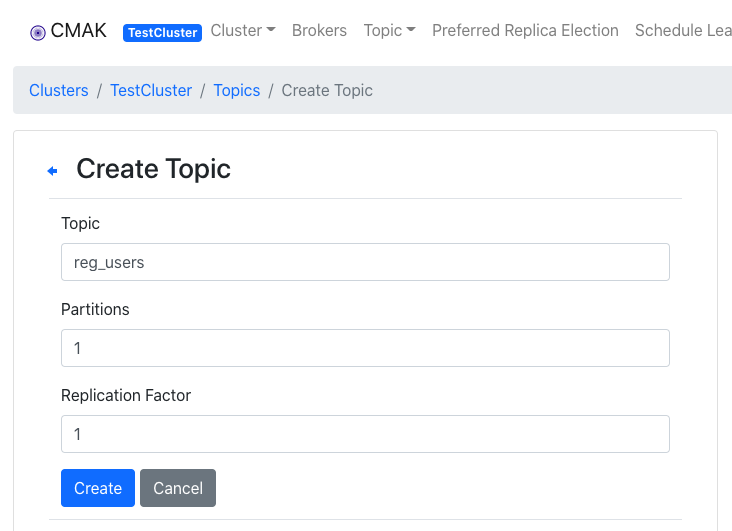

In [ ]:
"""
Data source
"""

from faker import Faker
fake = Faker()

def get_new_reg_user():
  return {
      'name': fake.name(),
      'addr': fake.address(),  
      'bio': fake.text()    
  }

# print(get_new_reg_user())

In [ ]:
"""
Producer
"""

import time
import json
from kafka import KafkaProducer


# serializer
def json_serializer(data):
  return json.dumps(data).encode('utf-8')

# instantiate producer
producer = KafkaProducer(
    bootstrap_servers='localhost:9092',
    value_serializer=json_serializer # takes `data` as input
    )

# send data
i = 0
while i<10:
  data_to_publish = get_new_reg_user()
  print('sending: ', data_to_publish)
  
  producer.send(
      topic='reg_users',
      value=data_to_publish
  )

  time.sleep(3)
  i = i+1

sending:  {'name': 'Ashley Lowe', 'addr': '71496 Gates Way Suite 929\nLake Samantha, PA 82636', 'bio': 'Seven others always policy must test. Effort analysis speech sometimes month book traditional. Personal most history language prepare until maintain.\nFoot order agent. Understand act perform three.'}
sending:  {'name': 'Mason Escobar', 'addr': '648 Mackenzie Lakes\nJordanville, IL 24884', 'bio': 'Great marriage law detail small.\nDiscussion that reduce conference drug. Result science position Mr commercial quality.'}
sending:  {'name': 'William Morgan', 'addr': '51564 Karen Club Suite 287\nLake Saraview, VA 47623', 'bio': 'Measure attorney range third lay hand. Only have sea step kitchen. Should get effort out explain however seat.'}
sending:  {'name': 'Gerald Jackson', 'addr': '922 Stefanie Plains Suite 720\nEast Sheilaburgh, UT 34820', 'bio': 'Last choice near wide better policy us. Such money soldier he. Bill personal ever every.\nThrough religious they eight and. Or ok court. Th

Partitions keep track of data inside them by incrementing **offsets**. Note that `Sum if partition offsets` will increase every `3 secs`

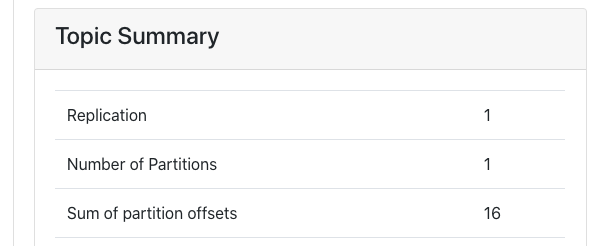

## **Case 2:**  Single Producer + Single broker + 2 Partitions. But publish only to one-specific partition

- Publisher can chose the partition to publish the messages in topic to
- While creating topic put `2` for `Partitions` or you can add partition using GUI

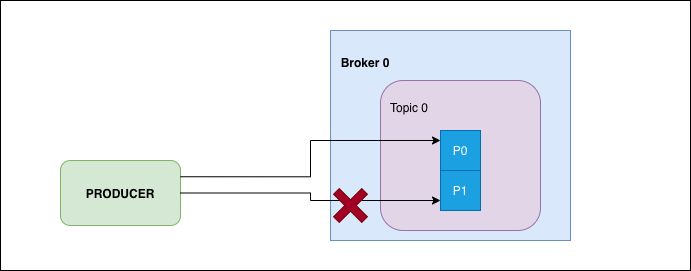

In [ ]:
"""
Producer tightly coupled with partition

+----------+            +-----------+
| Producer | <--------> | partion-k |
+----------+            +-----------+
"""

# define what partition to use (return id)
# for now, we can `ignore key_bytes`, `all_partition`, `available_partition`
def get_partition_to_pub_to(key_bytes, all_partition, available_partition):
  return 1

producer = KafkaProducer(
    bootstrap_servers='localhost:9092',
    value_serializer=json_serializer,  
    partitioner=get_partition_to_pub_to # change id to publish to other partitions
  )


i = 0
while i<10:
  data_to_publish = get_new_reg_user()
  print('sending: ', data_to_publish)
  
  producer.send(
      topic='reg_users',
      value=data_to_publish
  )

  time.sleep(3)
  i = i+1


sending:  {'name': 'Michael Ortiz', 'addr': '07042 Matthew Mountains\nGreenland, UT 19103', 'bio': 'Figure purpose control car ground moment. Very quickly economic.\nSouth several growth language staff message. Certainly ready body unit play hospital.'}
sending:  {'name': 'Steven Martinez DDS', 'addr': '8531 Figueroa Extensions Suite 892\nCrystalside, UT 07572', 'bio': 'Meet south everybody piece. Leg wife last others social guy.'}
sending:  {'name': 'Edward Hughes', 'addr': '9196 Murphy Trafficway\nPort Timothymouth, NJ 64257', 'bio': 'Toward write charge voice rate process direction. Goal mind bill student.\nResponse fill state democratic light. News civil check state very. Maintain even art network.'}
sending:  {'name': 'David Meyers', 'addr': '02069 Karen Run\nMelissaburgh, OH 87198', 'bio': 'Concern ten new yard put. Article statement can section senior pick between.\nSort condition true father page power.'}
sending:  {'name': 'Ann Robinson', 'addr': '741 Leslie Stream\nLake Jacob